# Data Analysis and Visualization SaaS-Sales

### Daftar Isi
1. Latar Belakang
2. Rumusan Masalah
3. Data Understanding
4. Data Preprocessing\
&nbsp;4.1 Duplicate\
&nbsp;4.2 Null Values\
&nbsp;4.3 Outlier\
&nbsp;4.4 Cleaning
5. Hasil Analisis\
&nbsp;5.1. Analisis Sales\
&emsp;5.1.1. Sales Pertahun dan Region\
&emsp;5.1.2. Sales berdasarkan Country\
&nbsp;5.2. Analisis Produk\
&emsp;5.2.1. Produk Secara Global\
&emsp;5.2.2. Tren Produk\
&nbsp;5.3. Analisis Industri Konsumen\
&emsp;5.2.1. Industri berdasarkan Region dan Country\
&emsp;5.2.2. Industri dan Sales
6. Kesimpulan
7. Rekomendasi

## 1. Latar Belakang
Perusahaan dengan bisnis *Sofware as a Service* (SaaS), ingin mengembangkan bisnis mereka ke negara lain. Perusahaan ini melakukan observasi penjualan SaaS di beberapa negara. Hal tersebut dilakukan untuk melihat tingkat penjualan setiap negara dan untuk menentukan negara yang cocok terhadap jenis SaaS produk yang dimiliki perusahaan.

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **2. Rumusan Masalah**
Perusahaan ingin menganalisis **negara yang kemungkinan membutuhkan produk SaaS dari perusahaan**. Informasi dari data akan membantu untuk melihat dan menganalisis kemungkinan negara yang akan membutuhkan produk dari perusahaan, sehingga dapat meningkatkan kostumer baru dan penjualan produk.

Sebagai seorang *data analyst* didalam perusahaan, diperlukan sebuah analisa data untuk menjawab pertanyaan berikut:

1. **Seberapa tinggi tingkat penjualan produk SaaS di negara-negara tertentu ?**
2. **Apakah setiap negara memiliki produk yang lebih diminati atau, didominasi oleh produk tertentu ?**
3. **Siapa saja yang kemungkinan menjadi calon konsumen baru berdasarkan industri mereka ?**

## **3. Data Understanding**

In [129]:
df=pd.read_csv('SaaS-Sales.csv')
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [130]:
baris,kolom = df.shape
print(f'Jumlah baris dataset (df) : {baris}')
print(f'Jumlah kolom dataset (df) : {kolom}')
df.info()

Jumlah baris dataset (df) : 9994
Jumlah kolom dataset (df) : 19
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discoun

In [131]:
print(f'Banyaknya baris pada data adalah {df.shape[0]}')
print(f'Banyaknya kolom pada data adalah {df.shape[1]}')

Banyaknya baris pada data adalah 9994
Banyaknya kolom pada data adalah 19


In [132]:
pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null': df.isna().mean().values * 100,
    'negative': [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
})

,feature,data_type,null,negative,n_unique,sample_unique
0,Row ID,int64,0.0,False,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Order ID,object,0.0,False,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021..."
2,Order Date,object,0.0,False,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4..."
3,Date Key,int64,0.0,False,1237,"[20221109, 20220613, 20211011, 20200609, 20230..."
4,Contact Name,object,0.0,False,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom..."
5,Country,object,0.0,False,48,"[Ireland, United States, Germany, Sweden, Cana..."
6,City,object,0.0,False,262,"[Dublin, New York City, Stuttgart, Stockholm, ..."
7,Region,object,0.0,False,3,"[EMEA, AMER, APJ]"
8,Subregion,object,0.0,False,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LAT..."
9,Customer,object,0.0,False,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ..."


In [133]:
display(df.describe(), df.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


In [134]:
numerical = df[['Sales','Quantity','Discount','Profit']].columns
numerical

Index(['Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [135]:
from scipy.stats import normaltest

temp = []
for i in range(len(numerical)):
    feat_name = numerical[i]
    stat, p_value = normaltest(df[feat_name])
    
    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    temp.append([feat_name, stat, p_value, distribution])

dist_df = pd.DataFrame(temp, columns=['Feature', "D'Agostino-Pearson Statistic", 'P-value', 'Distributed'])
dist_df

,Feature,D'Agostino-Pearson Statistic,P-value,Distributed
0,Sales,18033.308498,0.0,Not Normally Distributed
1,Quantity,2148.018022,0.0,Not Normally Distributed
2,Discount,2977.822121,0.0,Not Normally Distributed
3,Profit,14363.736244,0.0,Not Normally Distributed


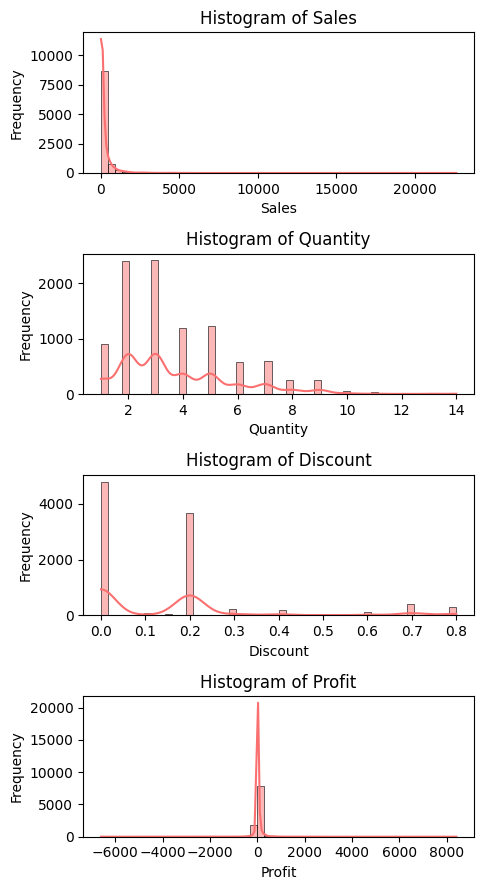

In [136]:
plt.figure(figsize=(9, 9))

for index, col in enumerate(numerical):
    # Histogram
    plt.subplot(len(numerical), 2, index * 2 + 1)
    sns.histplot(df[col], kde=True, color='#FA7070', bins=50)
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Insight
1. Data teridiri dari 9994 baris dan 19
2. Semua value pada kolom `License` bernilai unik, sehingga setiap transaksi yang dilakukan memiliki license yang berbeda.
3. Semua kolom numerikal(`Sales,Quantity,Discount,Profit`) pada data berdistribusi tidak normal.

## **4. Data Preprocessing**

### **4.1. Duplikat**

In [137]:
duplikat = df['License'].duplicated().sum()
duplikat_kombinasi = df[['Customer','Product','Sales','Date Key']].duplicated().sum()
print(f'Jumlah duplikat berdasarkan kolom License pada dataset (df) : {duplikat}')
print(f'Jumlah duplikat berdasarkan pasangan kolom Date Key, Customer, Product, Profit dan Sales adalah {duplikat_kombinasi}')

Jumlah duplikat berdasarkan kolom License pada dataset (df) : 0
Jumlah duplikat berdasarkan pasangan kolom Date Key, Customer, Product, Profit dan Sales adalah 2


### **4.2. Null Values**

In [138]:
df.isna().mean()*100

Row ID          0.0
Order ID        0.0
Order Date      0.0
Date Key        0.0
Contact Name    0.0
Country         0.0
City            0.0
Region          0.0
Subregion       0.0
Customer        0.0
Customer ID     0.0
Industry        0.0
Segment         0.0
Product         0.0
License         0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

### **4.3. Outlier**


In [139]:
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

for column in df[numerical]:
    outlier_result, lower_bound, upper_bound = calculate_outliers(df, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(df[column]) * 100, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,Sales,1167,11.68,-271.710000,498.930000
1,Quantity,170,1.70,-2.500000,9.500000
2,Discount,856,8.57,-0.300000,0.500000
3,Profit,1881,18.82,-39.724125,70.816875


### **4.4. Cleaning**

In [140]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

In [141]:
data = df.drop(columns=['Date Key','Customer ID','Row ID','Contact Name', 'Order ID','License','Segment','Subregion'])
data.head(5)

,Order Date,Country,City,Region,Customer,Industry,Product,Sales,Quantity,Discount,Profit
0,2022-11-09,Ireland,Dublin,EMEA,Chevron,Energy,Marketing Suite,261.9600,2,0.00,41.9136
1,2022-11-09,Ireland,Dublin,EMEA,Chevron,Energy,FinanceHub,731.9400,3,0.00,219.5820
2,2022-06-13,United States,New York City,AMER,Phillips 66,Energy,FinanceHub,14.6200,2,0.00,6.8714
3,2021-10-11,Germany,Stuttgart,EMEA,Royal Dutch Shell,Energy,ContactMatcher,957.5775,5,0.45,-383.0310
4,2021-10-11,Germany,Stuttgart,EMEA,Royal Dutch Shell,Energy,Marketing Suite - Gold,22.3680,2,0.20,2.5164


#### Insight
1. Data SaaS-Sales tidak memiliki data duplikat maupun data yang bernilai null, sehinggat tidak diperlukan handling pada tahap tersebut.
2. Mengubah tipe data `Oder Date` dari object ke datetime64 untuk mendukung proses analisis.
3. Ada 18.82% outlier pada kolom `profit` dan 11.68% outlier pada kolom `sales`, yang diputuskan untuk tidak dihilangkan dikarena faktor-faktor seperti kemungkinan adanya perbedaan harga pada setiap region atau adanya perkembangan harga setiap tahunnya. 
4. Berikut ini tabel yang menjelaskan kolom yang didrop beserta alasannya :

| Atribut | Alasan |
| --- | --- |
|Date Key | Date key merupakan key dari kolom Order Date yang nilainya sama dengan Order Date |
|Customer ID | Customer ID didrop karena nama Customer sudah tergolong unik, sehingga tidak diperlukan Customer ID |
|Row ID | Row ID tidak dibutuhkan karena analisis akan lebih memakai index baris yang disediakan oleh jupyter |
|Order ID, License, Segment, Discount | Order ID tidak dibutuhkan karena tidak digunakan dalam analisis sehingga dapat mengurangi tingkat komputasi |

## **5. Hasil Analisis**

### **5.1. Analisis Sales**

Analisis Sales dilakukan untuk menjawab pertanyaan **Seberapa tinggi tingkat penjualan produk SaaS di negara lain ?**. Analisis awal yang akan dilakukan yakni, melihat keseluruhan penjualan tiap tahun dan penjualan berdasarkan region.

#### 5.1.1. Sales Pertahun dan Region

Untuk melihat bagaimana penjualan produk SaaS secara gelobal, maka perlu dilihat perbandingan penjualan setiap regionnya. Penjualan tiap tahun berguna untuk melihat bagaimana perkembangan penjualan SaaS, sehingga kita dapat melihat perkembangan bisnis SaaS secara gelobal.

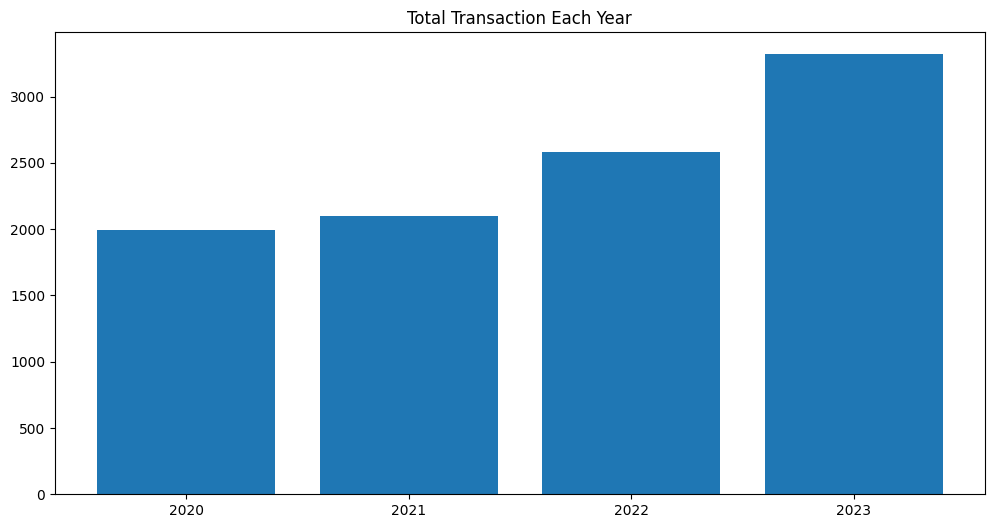

In [142]:
fig, ax = plt.subplots(figsize=(12, 6))

temp = data.copy()
temp['year'] = pd.DatetimeIndex(temp['Order Date']).year
temp_yearly = temp.groupby('year').count().reset_index()

ax.bar(height=temp_yearly['Customer'],x=temp_yearly['year'])
ax.set_xticks(np.unique(np.round(temp_yearly['year'], 0)))
ax.set_title('Total Transaction Each Year')

plt.show()

In [143]:
print('Berikut ini penjualan SaaS tiap tahunnya :')
temp['year'].value_counts()

Berikut ini penjualan SaaS tiap tahunnya :


year
2023    3319
2022    2580
2021    2102
2020    1993
Name: count, dtype: int64

In [144]:
data['Region'].value_counts()

Region
EMEA    4219
AMER    3665
APJ     2110
Name: count, dtype: int64

In [145]:
data_rs=data[['Region','Sales','Profit','Quantity']]
data_rs_total = data_rs.groupby('Region').sum().reset_index()
data_rs_total = data_rs_total.sort_values('Sales',ascending=False)
data_rs_total

,Region,Sales,Profit,Quantity
2,EMEA,1.043887e+06,147456.0450,16033
0,AMER,8.378496e+05,127426.9898,13879
1,APJ,4.154642e+05,11513.9869,7961


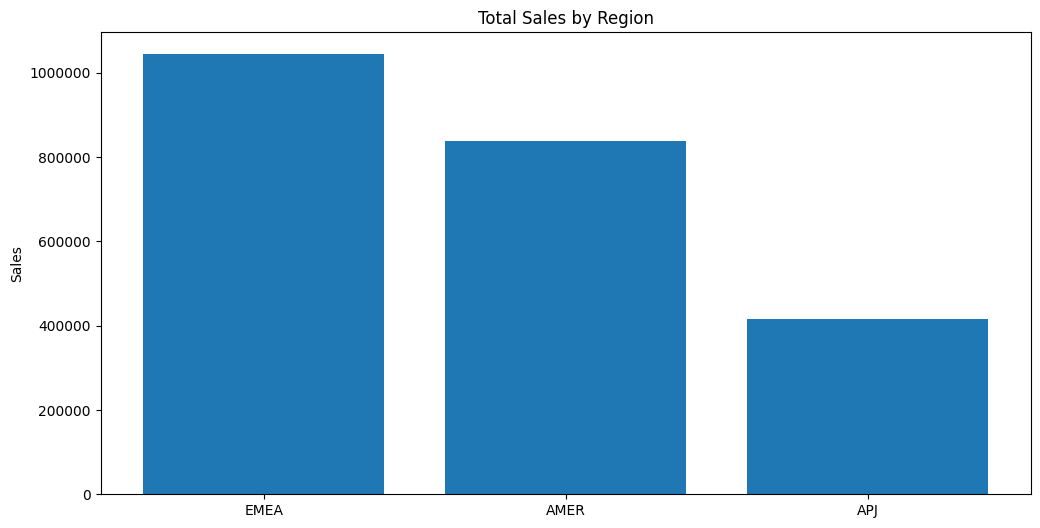

In [146]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(height=data_rs_total['Sales'],x=data_rs_total['Region'])
ax.set_title('Total Sales by Region')
ax.set_ylabel('Sales')
ax.ticklabel_format(style='plain', axis='y')

plt.show()

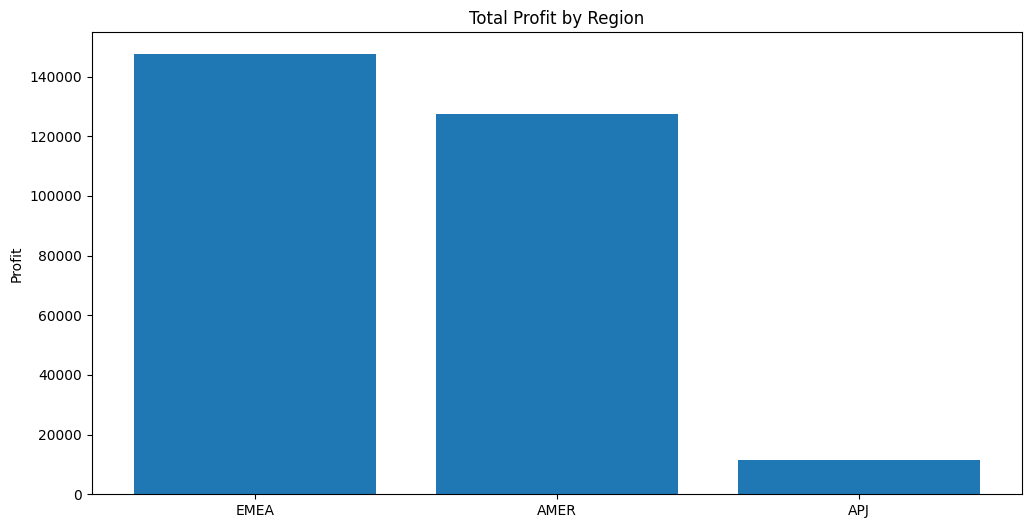

In [147]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(height=data_rs_total['Profit'],x=data_rs_total['Region'])
ax.set_title('Total Profit by Region')
ax.set_ylabel('Profit')

plt.show()

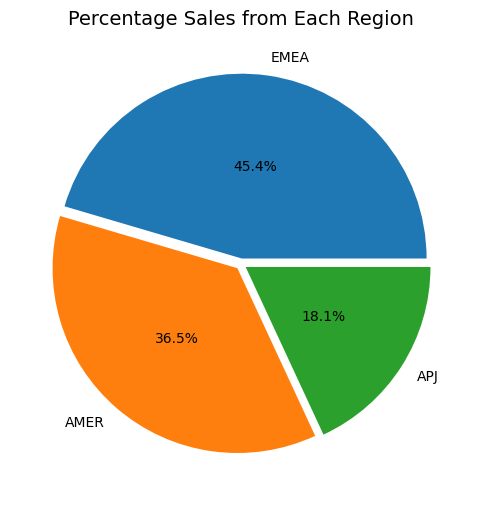

In [148]:
fig, ax = plt.subplots(figsize=(10, 6))
labels = data_rs_total['Region']
ax.pie(x=data_rs_total['Sales'], autopct="%.1f%%", explode=[0.03]*3, labels=labels, pctdistance=0.5)
ax.set_title("Percentage Sales from Each Region", fontsize=14)
plt.show()

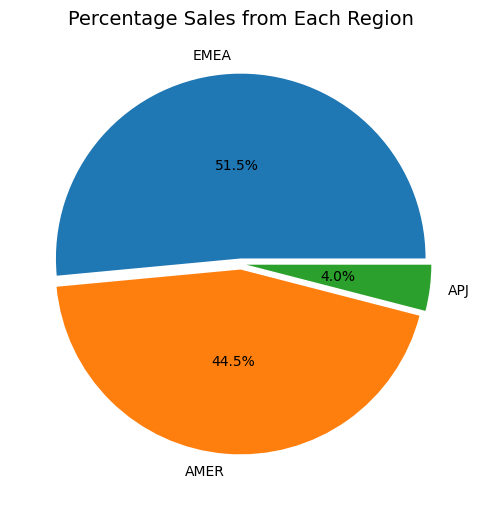

In [149]:
fig, ax = plt.subplots(figsize=(10, 6))
labels = data_rs_total['Region']
ax.pie(x=data_rs_total['Profit'], autopct="%.1f%%", explode=[0.03]*3, labels=labels, pctdistance=0.5)
ax.set_title("Percentage Sales from Each Region", fontsize=14)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_5560\1624432703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ys_region['Year'] = pd.DatetimeIndex(data_ys_region['Order Date']).year
C:\Users\User\AppData\Local\Temp\ipykernel_5560\1624432703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ys_region.drop(columns=['Order Date'],inplace=True)


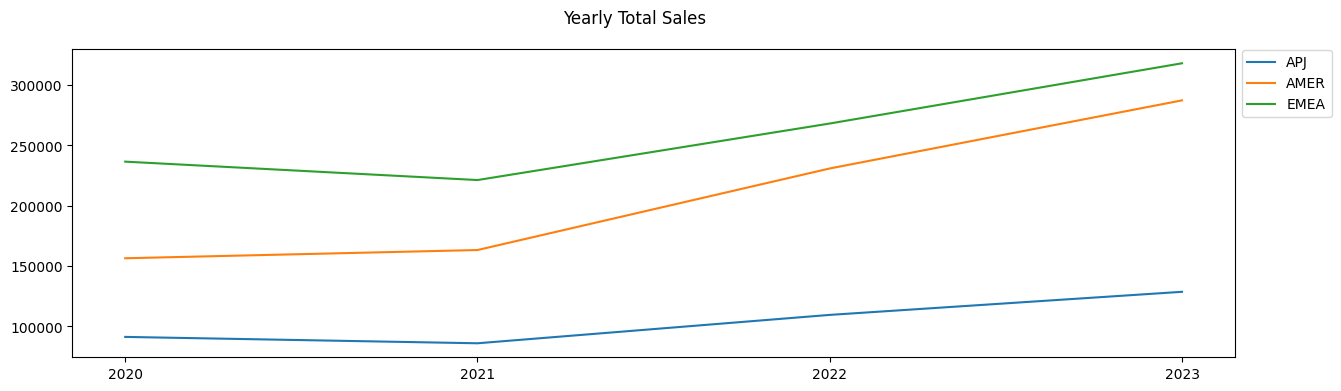

In [150]:
data_ys_region = data[['Region','Sales','Order Date']]
data_ys_region['Year'] = pd.DatetimeIndex(data_ys_region['Order Date']).year
data_ys_region.drop(columns=['Order Date'],inplace=True)
data_ys_region = data_ys_region.groupby(['Region','Year']).sum('Sales').reset_index()

apj_ys = data_ys_region[(data_ys_region['Region']=='APJ')][['Year','Sales']]
amer_ys= data_ys_region[(data_ys_region['Region']=='AMER')]
emea_ys= data_ys_region[(data_ys_region['Region']=='EMEA')]

apj_ys
fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(apj_ys['Year'],apj_ys['Sales'],label = "APJ")
ax.plot(amer_ys['Year'],amer_ys['Sales'],label = "AMER")
ax.plot(emea_ys['Year'],emea_ys['Sales'],label = "EMEA")
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left') 
ax.set_xticks(np.unique(np.round(temp_yearly['year'], 0)))
fig.suptitle(f'Yearly Total Sales')

plt.show()


#### Insight
1. Berdasarkan diagram *Amount of Transaction Each Year* dapat dilihat bahwa setiap tahunnya penjualan terus meningkat.Terjadi peningkatan kurang lebih sebesar 50% penjualan dari tahun 2020 ke tahun 2023
2. Berdasarkan diagram *Total Sales by Region* region EMEA (Europe, Middle East and Africa) memiliki penjualan tertinggi dimana lebih dari dua kali lipat penjualan APJ (Asia Pacific and Japan)
3. Hasil analisis sales berdasarkan region dapat dilihat bahwa sales produk SaaS terus meningkat dan region EMEA dan AMER(North, Central and South America) merupakan region yang berkuntribusi signifikan terhadap total penjualan SaaS secara gelobal.
4. Berdasarkan Profit penjualan APJ memiliki selisih terbesar antar Sales dengan Profit yang didapatkan, kurang lebih sekitar 5% Profit yang didapatkan dari keseluruan penjualan di APJ
5. Berdasarkan grafik *Yearly Total Sales* mulai dari tahun 2021 penjualan produk SaaS terus meningkat

#### 5.1.2. Sales berdasarkan Country

Pada tahap ini akan dilakukan analisis data sales dengan country. Analisis ini dilakukan untuk melihat lebih detail negara mana saja yang mempunya penjualan produk SaaS paling signifikan.

In [151]:
data_cs=data[['Country','Sales','Region','Quantity']]
data_cs_total = data_cs.groupby(['Country','Region']).sum().reset_index()
data_cs_total = data_cs_total.sort_values('Sales',ascending=False)
data_cs_total.head(10)

,Country,Region,Sales,Quantity
47,United States,AMER,457687.6315,7667
46,United Kingdom,EMEA,313169.8810,4268
24,Japan,APJ,170188.0458,3724
5,Canada,AMER,138641.2700,1883
15,France,EMEA,116511.9140,2153
16,Germany,EMEA,89473.7080,1379
1,Australia,APJ,80166.1010,1845
26,Mexico,AMER,78258.1360,1759
4,Brazil,AMER,76269.6140,946
40,Spain,EMEA,70636.7200,893


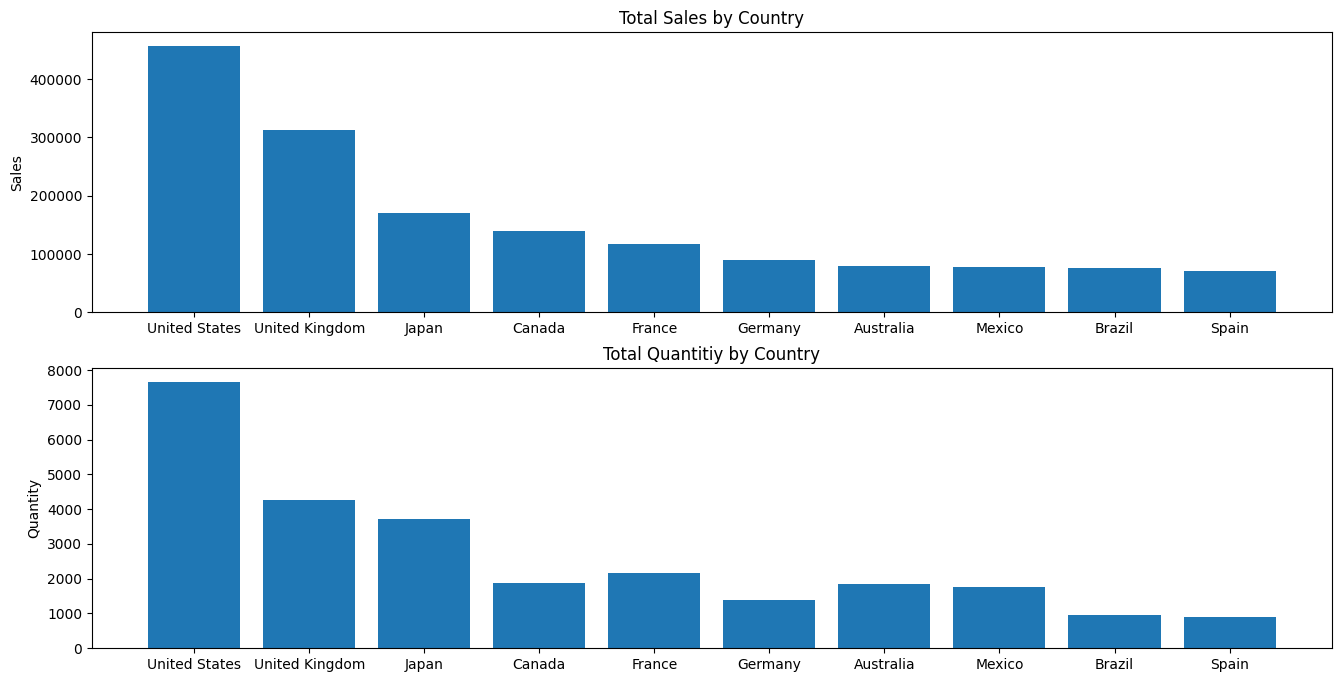

In [152]:
fig, ax = plt.subplots(2,figsize=(16, 8))
ax[0].bar(height=data_cs_total['Sales'].head(10),x=data_cs_total['Country'].head(10))
ax[0].set_title('Total Sales by Country')
ax[0].set_ylabel('Sales')

ax[1].bar(height=data_cs_total['Quantity'].head(10),x=data_cs_total['Country'].head(10))
ax[1].set_ylabel('Quantity')
ax[1].set_title('Total Quantitiy by Country')

plt.show()

In [153]:
# Uji tatistik untuk melihat apakah ada satu negara yang memiliki mendiannya sales-nya lebih signifikan dibandingkan negara yang lain
# karena distribusi data tidak normal, gunakan Kruskal
from scipy.stats import kruskal
stats,pval=kruskal(*[data[data['Country']==i]['Sales'] for i in data['Country'].unique()])
alpha = 0.05
if pval > 0.05:
    print(f'''
    pvalue = {pval:.5f}. pvalue > {alpha}. Gagal menolak Ho (Fail To Reject Ho).
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa minimal ada 1 negara yang berbeda median Sales-nya
    ''')
else:
    print(f'''
    pvalue = {pval:.5f}. pvalue <= {alpha}. Menolak Ho (Fail To Reject Ho).
    Kita punya cukup bukti untuk mengatakan bahwa minimal ada 1 negara yang berbeda median Sales-nya
    ''')


    pvalue = 0.00000. pvalue <= 0.05. Menolak Ho (Fail To Reject Ho).
    Kita punya cukup bukti untuk mengatakan bahwa minimal ada 1 negara yang berbeda median Sales-nya
    


In [154]:

total_sales = data_cs_total[(data_cs_total['Region']=='AMER')]['Sales'].sum()
print(f'Total penjualan country berdasarkan region AMER : {total_sales:.2f}')
display(data_cs_total[(data_cs_total['Region']=='AMER')])
print(f'Banyaknya negara pada region AMER :',data_cs_total[(data_cs_total['Region']=='AMER')].shape[0])

Total penjualan country berdasarkan region AMER : 837849.60


,Country,Region,Sales,Quantity
47,United States,AMER,457687.6315,7667
5,Canada,AMER,138641.2700,1883
26,Mexico,AMER,78258.1360,1759
4,Brazil,AMER,76269.6140,946
0,Argentina,AMER,35764.3120,454
6,Chile,AMER,35282.0010,862
8,Colombia,AMER,8481.7100,172
9,Costa Rica,AMER,7464.9300,136


Banyaknya negara pada region AMER : 8


In [155]:
total_sales = data_cs_total[(data_cs_total['Region']=='EMEA')]['Sales'].sum()
print(f'Total penjualan country berdasarkan region EMEA : {total_sales:.2f}')
display(data_cs_total[(data_cs_total['Region']=='EMEA')])
print('Banyaknya negara pada region EMEA :',data_cs_total[(data_cs_total['Region']=='EMEA')].shape[0])

Total penjualan country berdasarkan region EMEA : 1043887.02


,Country,Region,Sales,Quantity
46,United Kingdom,EMEA,313169.881,4268
15,France,EMEA,116511.914,2153
16,Germany,EMEA,89473.708,1379
40,Spain,EMEA,70636.720,893
41,Sweden,EMEA,55603.164,983
14,Finland,EMEA,49095.840,705
21,Ireland,EMEA,34298.140,479
23,Italy,EMEA,32114.610,463
34,Russia,EMEA,32108.118,693
38,South Africa,EMEA,30661.873,681


Banyaknya negara pada region EMEA : 30


In [156]:
total_sales = data_cs_total[(data_cs_total['Region']=='APJ')]['Sales'].sum()
print(f'Total penjualan country berdasarkan region APJ : {total_sales:.2f}')
display(data_cs_total[(data_cs_total['Region']=='APJ')])
print('Banyaknya negara pada region APJ :',data_cs_total[(data_cs_total['Region']=='APJ')].shape[0])

Total penjualan country berdasarkan region APJ : 415464.24


,Country,Region,Sales,Quantity
24,Japan,APJ,170188.0458,3724
1,Australia,APJ,80166.1010,1845
19,India,APJ,53555.3600,578
39,South Korea,APJ,28634.4340,491
30,Philippines,APJ,27451.0690,367
7,China,APJ,23705.5230,420
36,Singapore,APJ,19683.3900,247
28,New Zealand,APJ,4783.5220,151
42,Taiwan,APJ,4382.4860,64
20,Indonesia,APJ,2914.3100,74


Banyaknya negara pada region APJ : 10


C:\Users\User\AppData\Local\Temp\ipykernel_5560\4004963064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ys_country['Year'] = pd.DatetimeIndex(data_ys_country['Order Date']).year
C:\Users\User\AppData\Local\Temp\ipykernel_5560\4004963064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ys_country.drop(columns=['Order Date'],inplace=True)


Text(0.5, 0.98, 'Yearly Total Sales')

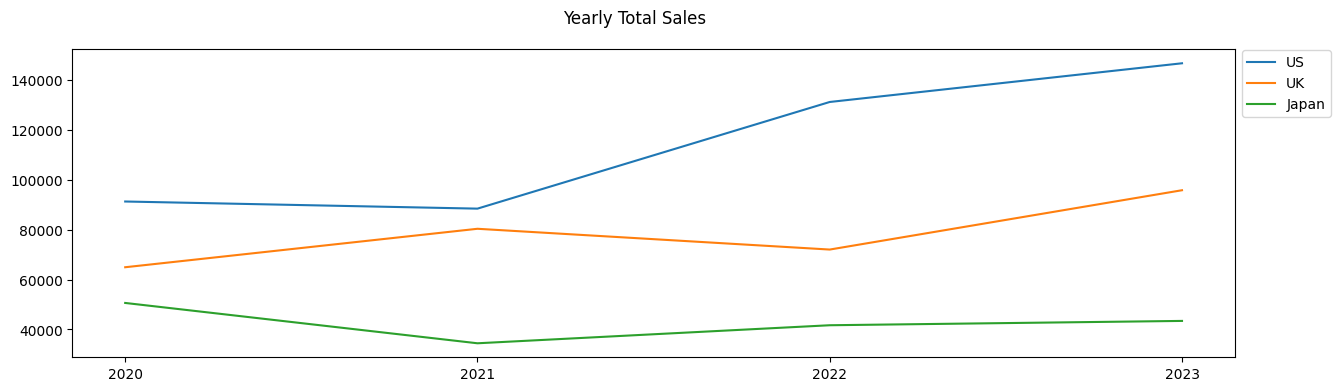

In [157]:
data_ys_country = data[['Country','Sales','Order Date']]
data_ys_country['Year'] = pd.DatetimeIndex(data_ys_country['Order Date']).year
data_ys_country.drop(columns=['Order Date'],inplace=True)
data_ys_country = data_ys_country.groupby(['Country','Year']).sum('Sales').reset_index()

us_ys = data_ys_country[(data_ys_country['Country']=='United States')]
uk_ys= data_ys_country[(data_ys_country['Country']=='United Kingdom')]
jp_ys= data_ys_country[(data_ys_country['Country']=='Japan')]

fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(us_ys['Year'],us_ys['Sales'],label = "US")
ax.plot(uk_ys['Year'],uk_ys['Sales'],label = "UK")
ax.plot(jp_ys['Year'],jp_ys['Sales'],label = "Japan")
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left') 
ax.set_xticks(np.unique(np.round(temp_yearly['year'], 0)))
fig.suptitle(f'Yearly Total Sales')



In [158]:
uk_ys

,Country,Year,Sales
170,United Kingdom,2020,64944.287
171,United Kingdom,2021,80366.367
172,United Kingdom,2022,72035.922
173,United Kingdom,2023,95823.305


In [159]:
data_yq_country = data[['Country','Quantity','Order Date']]
data_yq_country['Year'] = pd.DatetimeIndex(data_yq_country['Order Date']).year
data_yq_country.drop(columns=['Order Date'],inplace=True)
data_yq_country = data_yq_country.groupby(['Country','Year']).sum('Quantity').reset_index()

uk_yq= data_yq_country[(data_yq_country['Country']=='United Kingdom')]
uk_yq

C:\Users\User\AppData\Local\Temp\ipykernel_5560\4183693088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_yq_country['Year'] = pd.DatetimeIndex(data_yq_country['Order Date']).year
C:\Users\User\AppData\Local\Temp\ipykernel_5560\4183693088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_yq_country.drop(columns=['Order Date'],inplace=True)


,Country,Year,Quantity
170,United Kingdom,2020,759
171,United Kingdom,2021,968
172,United Kingdom,2022,1196
173,United Kingdom,2023,1345


Text(0.5, 0.98, 'United Kingdom Yearly Total Quantity')

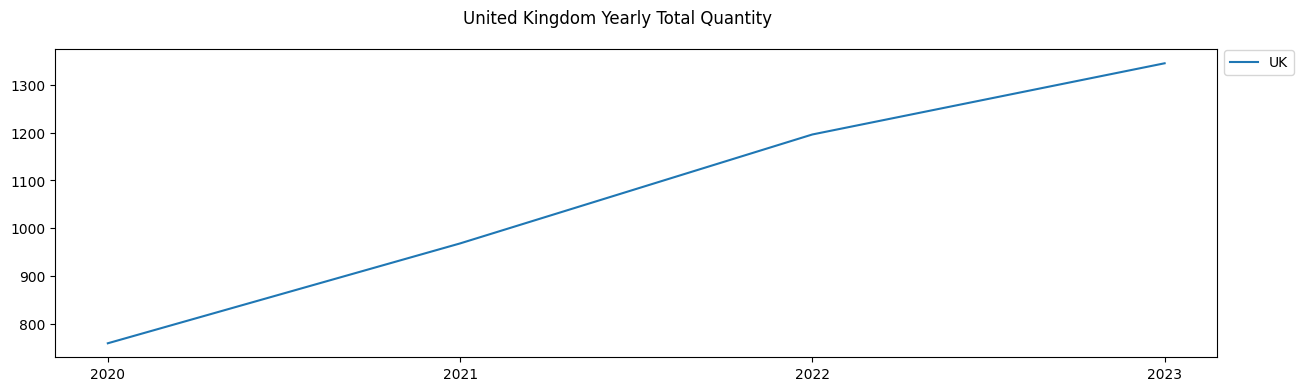

In [160]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(uk_yq['Year'],uk_yq['Quantity'],label = "UK")
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left') 
ax.set_xticks(np.unique(np.round(temp_yearly['year'], 0)))
fig.suptitle(f'United Kingdom Yearly Total Quantity')

In [185]:
data_yd_country = data[['Country','Discount','Order Date']]
data_yd_country['Year'] = pd.DatetimeIndex(data_yd_country['Order Date']).year
data_yd_country.drop(columns=['Order Date'],inplace=True)
data_yd_country = data_yd_country.groupby(['Country','Year']).sum('Discount').reset_index()

uk_yd= data_yd_country[(data_yd_country['Country']=='United Kingdom')]
uk_yd

C:\Users\User\AppData\Local\Temp\ipykernel_5560\1177941901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_yd_country['Year'] = pd.DatetimeIndex(data_yd_country['Order Date']).year
C:\Users\User\AppData\Local\Temp\ipykernel_5560\1177941901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_yd_country.drop(columns=['Order Date'],inplace=True)


,Country,Year,Discount
170,United Kingdom,2020,12.4
171,United Kingdom,2021,13.6
172,United Kingdom,2022,19.9
173,United Kingdom,2023,16.5


#### Insight
1. Berdasarkan hasil data diatas dapat dilihat bahwa US (United State), UK (United Kingdom), dan Japan merupakan 3 negara yang memiliki penjualan tertinggi secara gelobal. Walaupun jumlah penjualan UK dengan Japan tidak terlalu berbeda jauh berdasarkan grafik namun hasil penjualan UK kurang lebih dua kali lebih besar dibandingkan penjualan negara Japan.
2. Berdasarkan hasil analisis sebelumnya EMEA merupakan region dengan penjualan tertinggi dan dari hasil penjabaran negara EMEA dapat dilihat bahwa jumlah negara EMEA yakni 30 negara dimana EMEA kurang lebih memiliki tiga kali lipat negara dibandingkan region lainnya.
3. Terjadi perbedaan pada penjualan tahunan dimana total penjualan SaaS menurun pada tahun 2022 di negara UK, sedangkan secara region seharusnya penjualan SaaS terus meningkat dari tahun 2021. Hal tersebut dikarenakan jumlah discount di negara UK pada tahun 2022 merupakan discount yang tertinggi yakni 19.9

### **5.2 Analisis Produk**
Analisis produk dilakukan untuk melihat **Apakah setiap negara memiliki produk yang lebih diminati atau, didominasi oleh produk tertentu ?**. Analisis ini akan melihat ada atau tidaknya hubungan antara produk dengan region atau negara-negara tertentu.

### 5.2.1. Produk Secara Global

In [161]:
data['Product'].value_counts()

Product
ContactMatcher                1842
Support                       1560
FinanceHub                     981
SaaS Connector Pack            957
Site Analytics                 889
Marketing Suite - Gold         846
ChatBot Plugin                 796
Data Smasher                   775
OneView                        466
SaaS Connector Pack - Gold     254
Marketing Suite                228
Storage                        217
Big Ol Database                115
Alchemy                         68
Name: count, dtype: int64

Merubah nilai Marketing Suit - Gold dan SaaS connector Pack - Gold menjadi, Marketing Suit dan SaaS connector Pack. Hal tersebut dilakukan kedua item tersebut memiliki kategori yang sama, sehingga dapat mempermudah analisis kategori produk yang paling diminati.

In [162]:
data['Product'].mask(data['Product'] == 'Marketing Suite - Gold', 'Marketing Suite', inplace=True)
data['Product'].mask(data['Product'] == 'SaaS Connector Pack - Gold', 'SaaS Connector Pack', inplace=True)
data['Product'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_5560\4170104474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Product'].mask(data['Product'] == 'Marketing Suite - Gold', 'Marketing Suite', inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_5560\4170104474.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

Product
ContactMatcher         1842
Support                1560
SaaS Connector Pack    1211
Marketing Suite        1074
FinanceHub              981
Site Analytics          889
ChatBot Plugin          796
Data Smasher            775
OneView                 466
Storage                 217
Big Ol Database         115
Alchemy                  68
Name: count, dtype: int64

In [163]:
data['Product'].value_counts()/len(data['Product'])*100

Product
ContactMatcher         18.431059
Support                15.609366
SaaS Connector Pack    12.117270
Marketing Suite        10.746448
FinanceHub              9.815890
Site Analytics          8.895337
ChatBot Plugin          7.964779
Data Smasher            7.754653
OneView                 4.662798
Storage                 2.171303
Big Ol Database         1.150690
Alchemy                 0.680408
Name: count, dtype: float64

In [164]:
data_cp = pd.crosstab(data['Country'], data['Product'])
data_cp.head(5)

Product,Alchemy,Big Ol Database,ChatBot Plugin,ContactMatcher,Data Smasher,FinanceHub,Marketing Suite,OneView,SaaS Connector Pack,Site Analytics,Storage,Support
Country,,,,,,,,,,,,
Argentina,0,3,11,17,9,13,11,13,18,9,5,21
Australia,4,5,37,98,33,51,57,20,65,42,13,67
Austria,0,1,2,1,0,1,0,0,2,0,0,3
Belgium,0,2,14,19,10,14,10,6,7,15,2,25
Brazil,2,2,25,50,15,29,28,16,23,27,5,33


In [165]:
from scipy.stats import chi2_contingency

stat, pvalue, dof, expected_freq = chi2_contingency(data_cp)

if pvalue > alpha:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > {alpha}. Gagal menolak Ho (Fail To Reject Ho).
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa antara Region dan Product ada keterkaitan (dependent)
    ''')
else:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= {alpha}. Menolak Ho (Reject Ho).
    Kita punya cukup bukti untuk mengatakan bahwa antara Region dan Product ada keterkaitan (dependent)
    ''')


    pvalue = 0.82067. pvalue > 0.05. Gagal menolak Ho (Fail To Reject Ho).
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa antara Region dan Product ada keterkaitan (dependent)
    


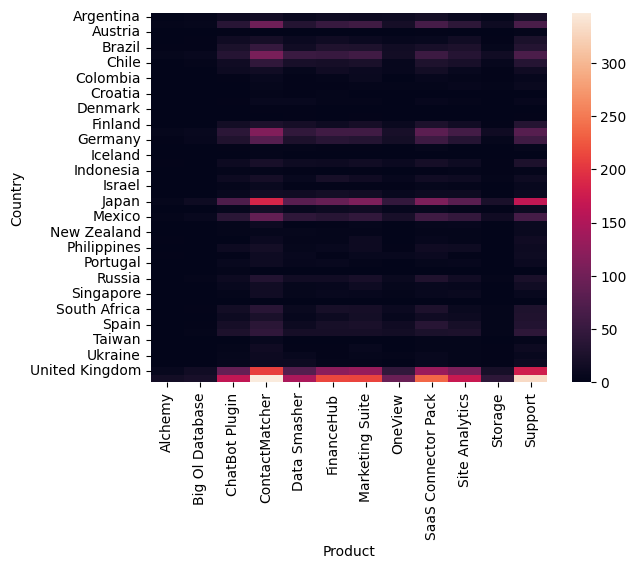

In [166]:
sns.heatmap(data_cp)
plt.show()

#### Insight
1. Berdasarkan Cmap dan analisis chi-square diatas dapat dilihat bahwa tidak ada region yang mendominasi produk tertentu.
2. Lebih dari 50% produk secara gelobal didominasi oleh produk ContactMatcher, Support, SaaS Connector Pack, dan Marketing Suite

### 5.2.2. Tren Produk 

Pada tahapan ini kita akan melihat tren produk apa saja yang populer pada tahun 2023. Kita akan mengambil 3 negara teratas yakni US, UK dan Japan untuk melihat tren produk SaaS di negara-negara tersebut.

In [167]:
data_cp_popular = data[['Product','Country']]
data_cp_popular.groupby('Country').count().sort_values(by='Product',ascending=False).head(5)

,Product
Country,
United States,2001
United Kingdom,1141
Japan,985
France,587
Canada,506


In [168]:
data_cp['Total']=data_cp.sum(axis=1)
data_cp.sort_values('Total',ascending=False).head(5)

Product,Alchemy,Big Ol Database,ChatBot Plugin,ContactMatcher,Data Smasher,FinanceHub,Marketing Suite,OneView,SaaS Connector Pack,Site Analytics,Storage,Support,Total
Country,,,,,,,,,,,,,
United States,17,23,165,347,147,213,212,94,237,172,42,332,2001
United Kingdom,8,16,90,210,77,122,131,46,133,109,21,178,1141
Japan,5,13,71,186,81,91,110,47,111,80,24,166,985
France,5,7,40,113,45,59,59,23,82,62,14,78,587
Canada,5,7,34,107,53,51,59,17,55,35,15,68,506


In [169]:
#Prosedur untuk menampilkan line chart sebuah trend produk dengan parameter region dimana parameter tersebut adalah string contohnya 'APJ'
def monthly_trend_region(region):
    temp_1 = data[(data['Region'] == region)&(pd.DatetimeIndex(data['Order Date']).year == 2023)][['Region','Product']]
    temp_1['Month'] = data['Order Date'].dt.strftime('%b')
    temp_1['Month'] = pd.Categorical(temp_1["Month"],
                                categories=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul",
                                            "Aug", "Sep", "Oct", "Nov", "Dec"],
                                ordered=True)
    temp_2 = pd.crosstab(temp_1['Month'],temp_1['Product'])
    
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.plot(temp_2,linewidth=3)
    colormap = plt.cm.turbo
    colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines))]
    for i,j in enumerate(ax.lines):
        j.set_color(colors[i])
    ax.legend(temp_2.columns,bbox_to_anchor=(1, 1.015), ncol=2)
    fig.suptitle(f'Monthly Trend of Products in {region} 2023')

Berikut ini grafik tren produk untuk region secara global :

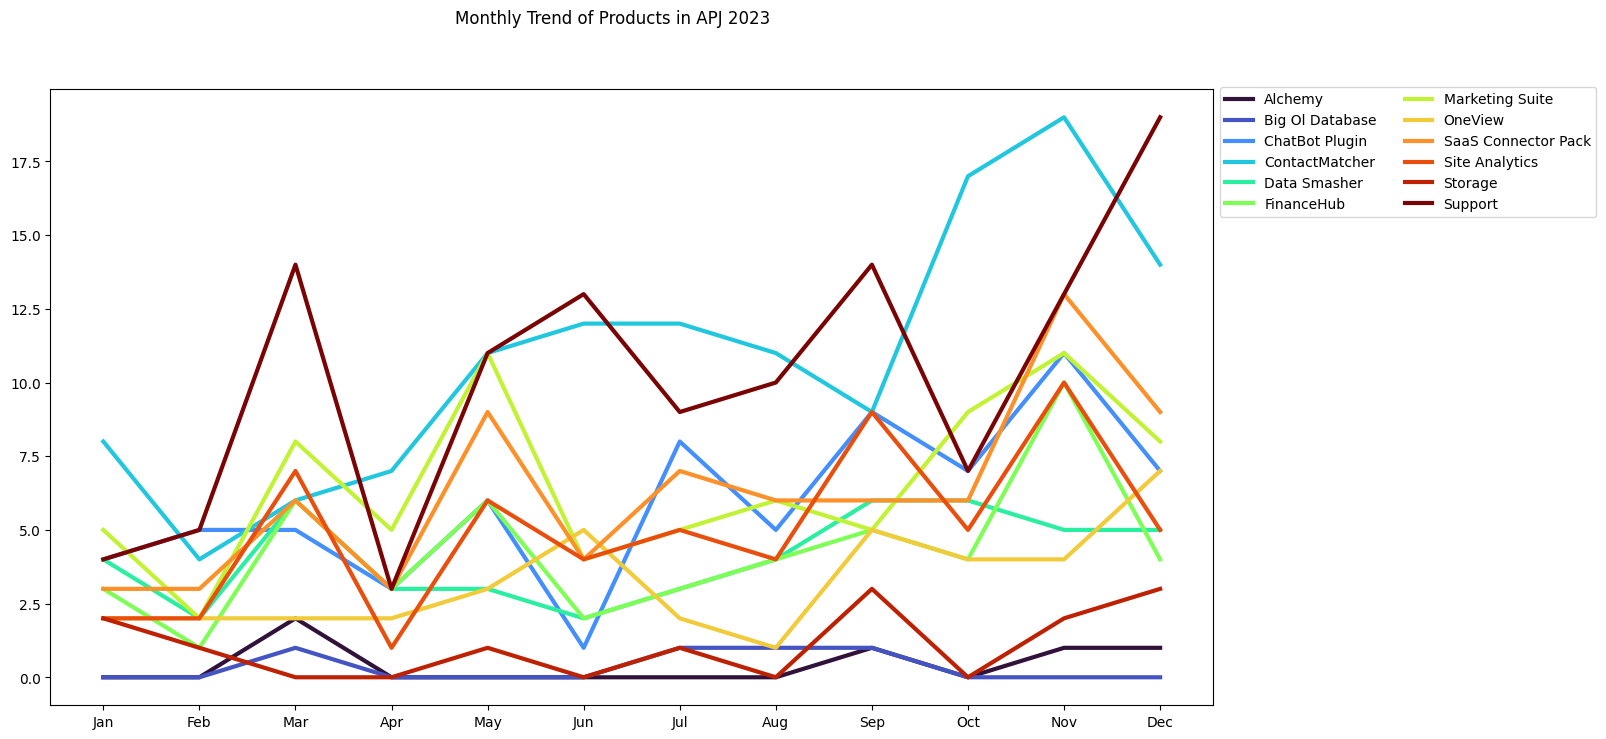

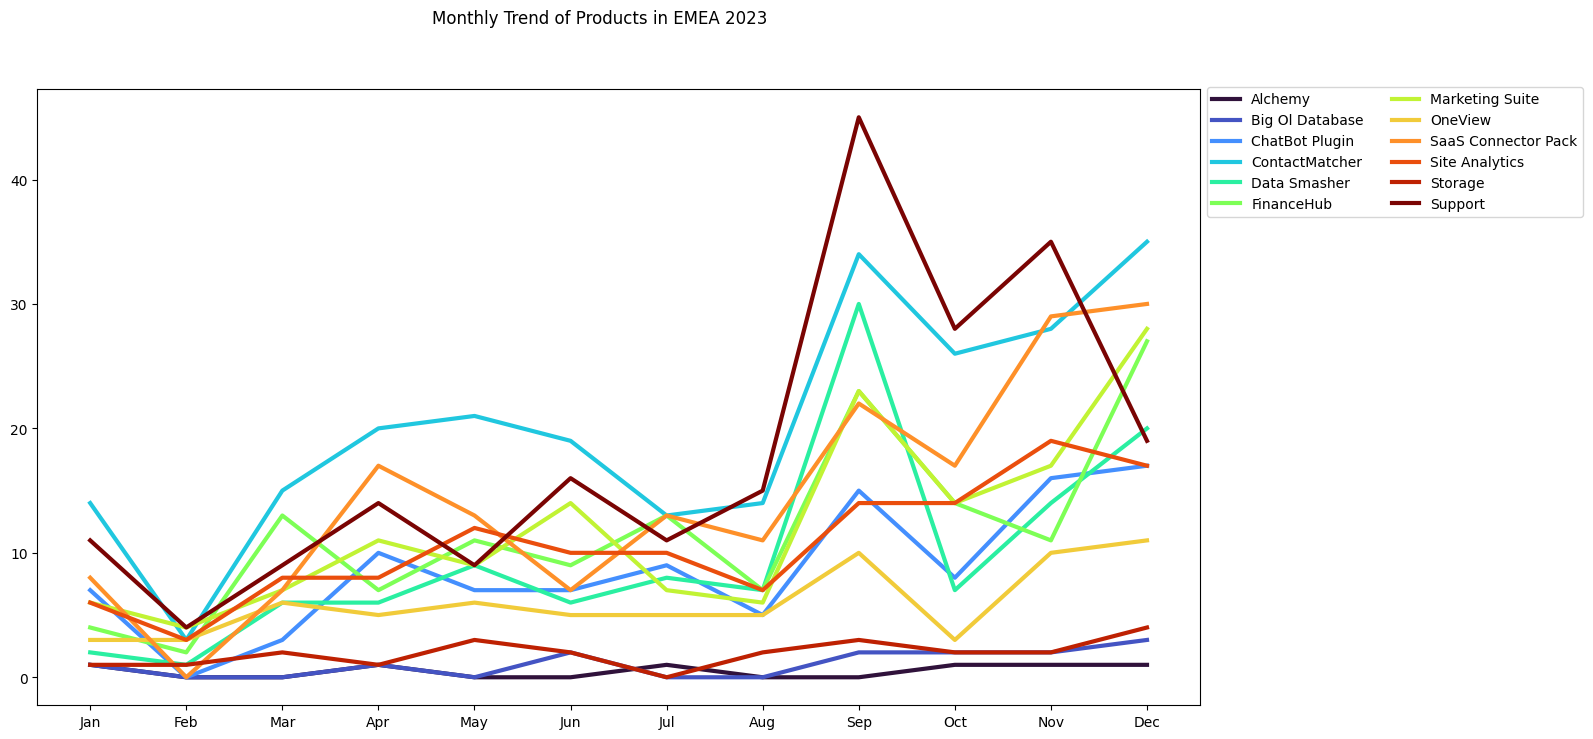

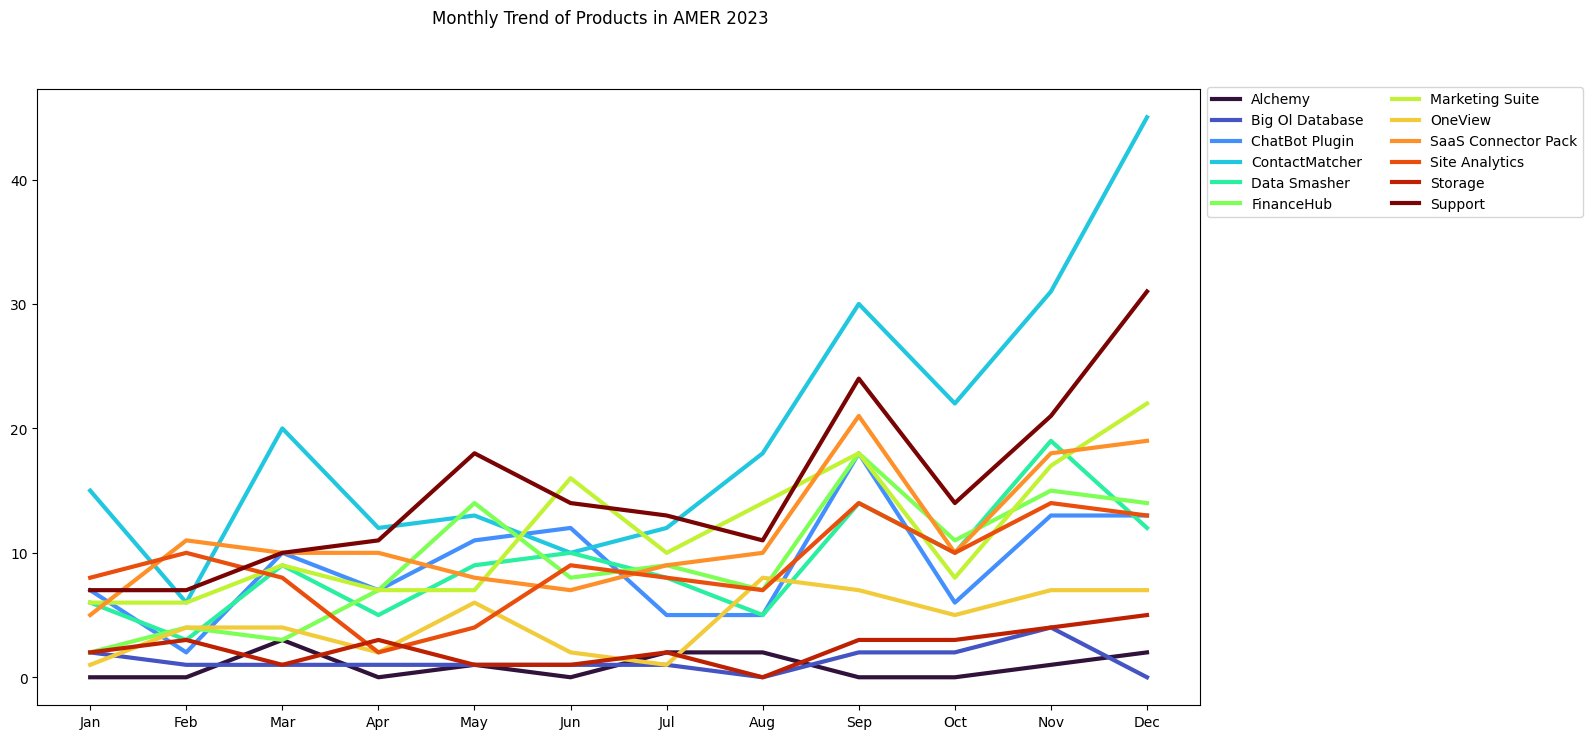

In [170]:
monthly_trend_region('APJ')
monthly_trend_region('EMEA')
monthly_trend_region('AMER')

In [171]:
def monthly_trend_country(country):
    temp_1 = data[(data['Country'] == country)&(pd.DatetimeIndex(data['Order Date']).year == 2023)][['Country','Product']]
    temp_1['Month'] = data['Order Date'].dt.strftime('%b')
    temp_1['Month'] = pd.Categorical(temp_1["Month"],
                                categories=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul",
                                            "Aug", "Sep", "Oct", "Nov", "Dec"],
                                ordered=True)
    temp_2 = pd.crosstab(temp_1['Month'],temp_1['Product'])
    
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.plot(temp_2,linewidth=3)
    colormap = plt.cm.turbo
    colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines))]
    for i,j in enumerate(ax.lines):
        j.set_color(colors[i])
    ax.legend(temp_2.columns,bbox_to_anchor=(1, 1.015), ncol=2)
    fig.suptitle(f'Monthly Trend of Products in {country} 2023')

Berikut ini grafik tren produk pada tahun 2023 untuk negara US, UK dan Japan :

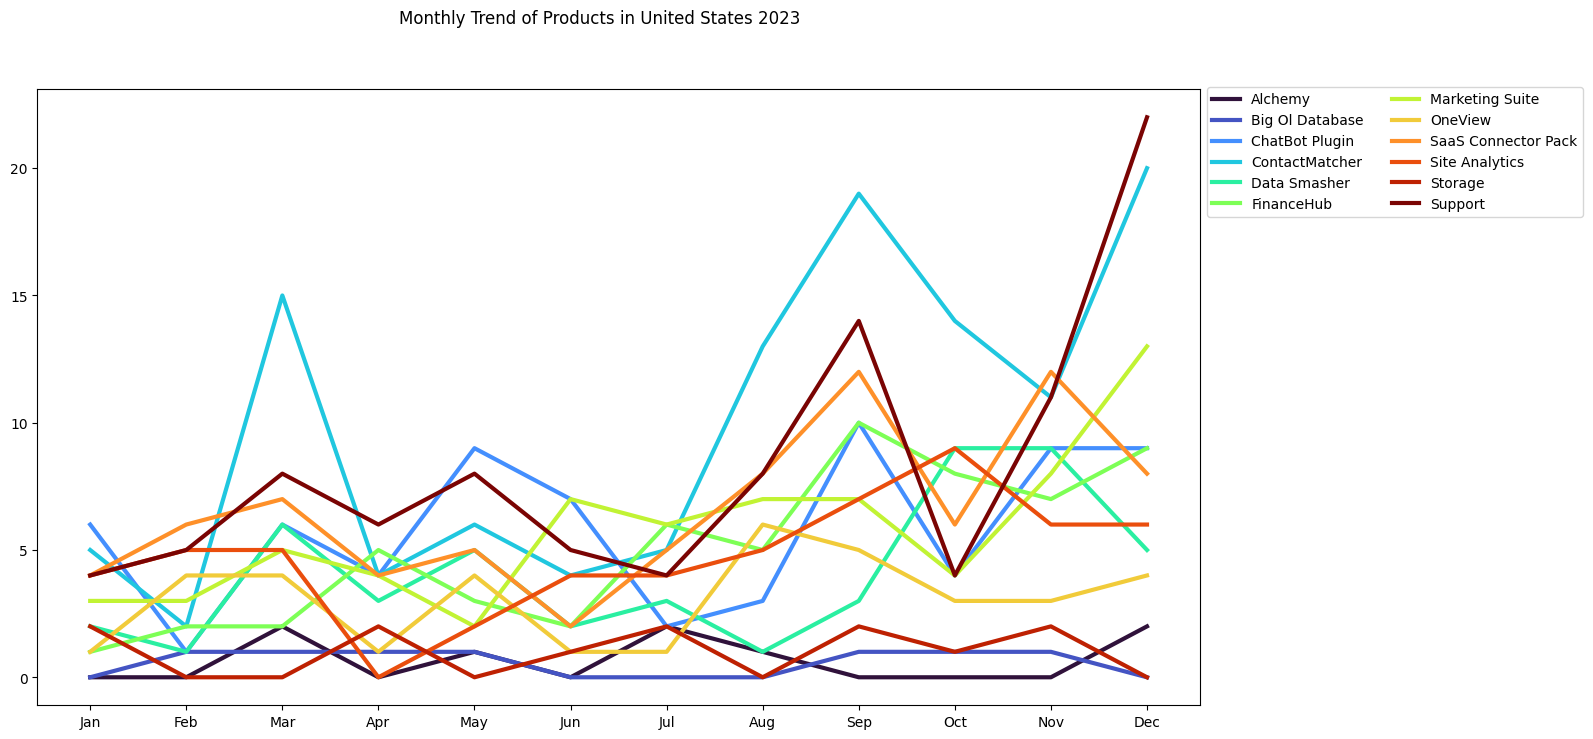

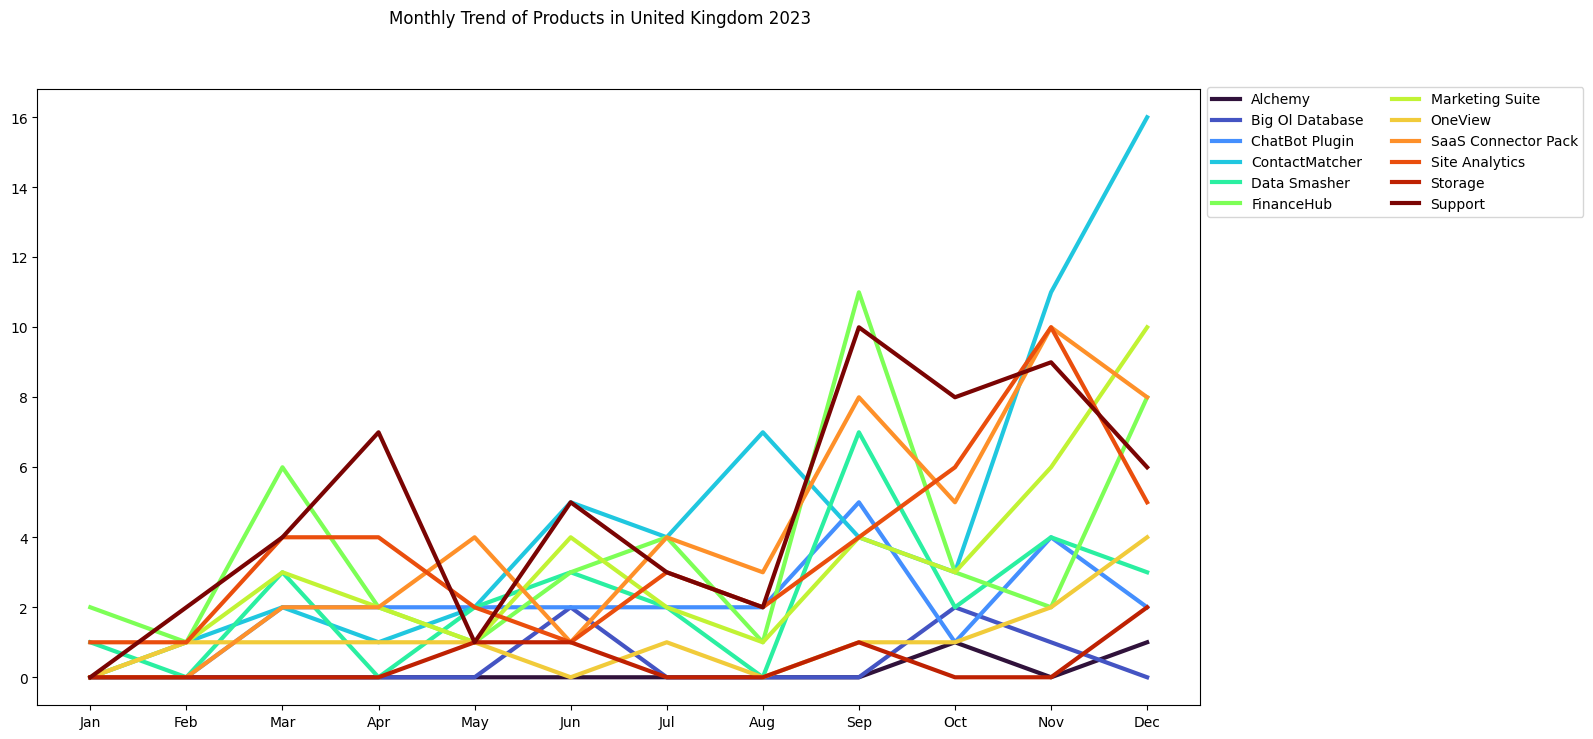

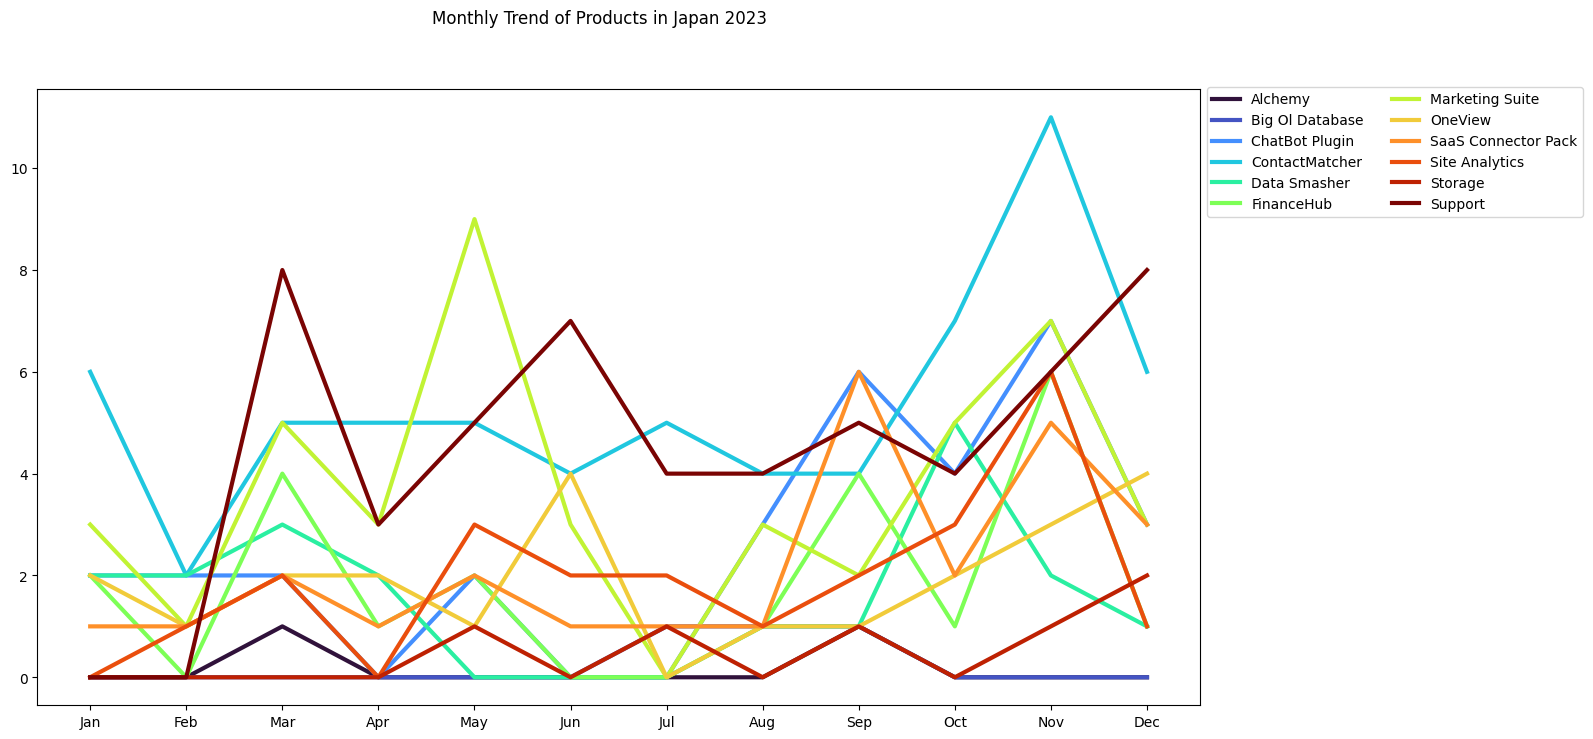

In [172]:
monthly_trend_country('United States')
monthly_trend_country('United Kingdom')
monthly_trend_country('Japan')

#### Insight
1. Pada tahun 2023 tran produk SaaS yang terjadi pada 3 negara tersebut adalah ContactMatcher
2. Pada grafik region 2023 ContactMatcher dan Support merupakan produk yang sedang tren, kecuali pada region EMEA dimana produk support menurun dibulan Desember.
3. Berdasarkan hasil analisis produk ContactMatcher merupakan produk SaaS yang paling diminiati pada 2023.

### **5.3. Analisis Industri Konsumen**
Analisis Industri dilakukan untuk memperhitungkan **Siapa saja yang kemungkinan menjadi calon konsumen baru berdasarkan dari data industri ?**. Analisis ini digunakan untuk melihat industri mana yang paling berkontribusi secara signifikan dalam melakukan pembelian produk SaaS, sehingga perusahaan dapat melihat konsumen mana yang cocok berdasarkan industrinya.

### 5.3.1. Industri berdasarkan Region dan Country
Melihat banyaknya konsumen pada industri tertentu berdasarkan region dan country. Hasil ini berguna untuk melihat tingkat mayoritas industri yang mengkonsumsi produk SaaS

In [173]:
data.head(5)

,Order Date,Country,City,Region,Customer,Industry,Product,Sales,Quantity,Discount,Profit
0,2022-11-09,Ireland,Dublin,EMEA,Chevron,Energy,Marketing Suite,261.9600,2,0.00,41.9136
1,2022-11-09,Ireland,Dublin,EMEA,Chevron,Energy,FinanceHub,731.9400,3,0.00,219.5820
2,2022-06-13,United States,New York City,AMER,Phillips 66,Energy,FinanceHub,14.6200,2,0.00,6.8714
3,2021-10-11,Germany,Stuttgart,EMEA,Royal Dutch Shell,Energy,ContactMatcher,957.5775,5,0.45,-383.0310
4,2021-10-11,Germany,Stuttgart,EMEA,Royal Dutch Shell,Energy,Marketing Suite,22.3680,2,0.20,2.5164


In [174]:
data_ri = pd.crosstab(data['Region'],data['Industry'])
data_ri

Industry,Communications,Consumer Products,Energy,Finance,Healthcare,Manufacturing,Misc,Retail,Tech,Transportation
Region,,,,,,,,,,
AMER,214,374,464,743,433,457,24,369,472,115
APJ,112,213,338,458,193,220,39,205,239,93
EMEA,267,434,514,926,423,545,44,398,525,143


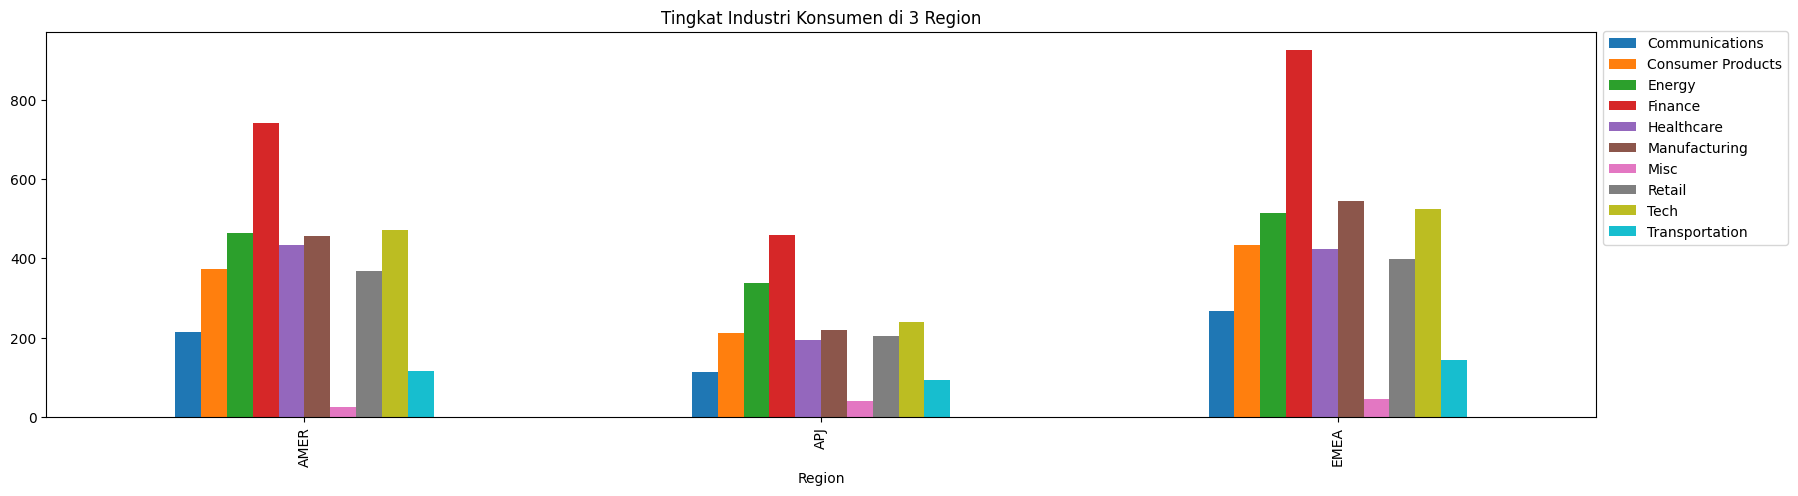

In [175]:
data_ri.plot(kind='bar',figsize=(20,5), title='Tingkat Industri Konsumen di 3 Region')
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

plt.show()

In [176]:
data_ri_2023 = pd.crosstab(data[(pd.DatetimeIndex(data['Order Date']).year == 2023)]['Region'],data[(pd.DatetimeIndex(data['Order Date']).year == 2023)]['Industry'])
data_ri_2023

Industry,Communications,Consumer Products,Energy,Finance,Healthcare,Manufacturing,Misc,Retail,Tech,Transportation
Region,,,,,,,,,,
AMER,76,128,149,270,158,142,5,108,170,34
APJ,24,85,118,130,60,97,9,63,84,28
EMEA,81,101,196,350,141,158,15,132,153,54


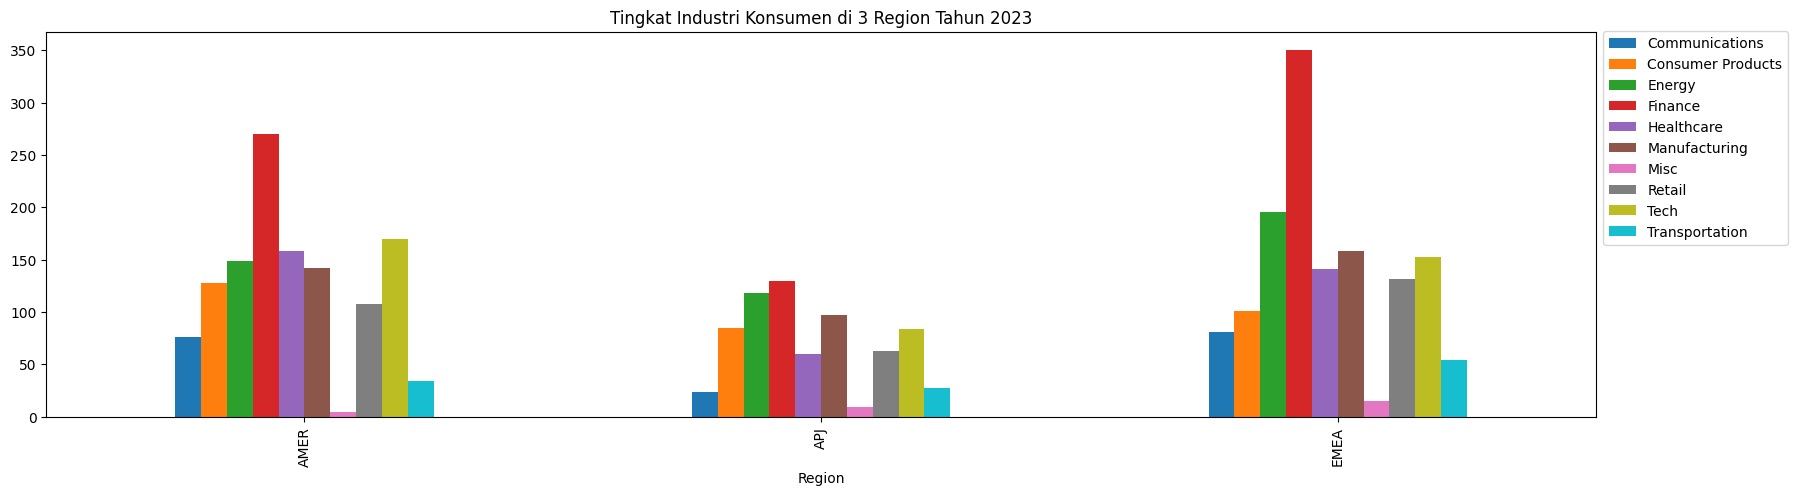

In [177]:
data_ri_2023.plot(kind='bar',figsize=(20,5), title='Tingkat Industri Konsumen di 3 Region Tahun 2023')
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

plt.show()

### Insight
Berdasarkan hasil grafik industri Finance merupakan industri yang mendominasi dalam pembelian produk SaaS. Namun, pada tahun 2023 pembelian produk SaaS di region APJ tidak signifikan dibandingkan region lain dan tidak jauh signifikan saat data dihitung secara keseluruhan.

### 5.3.2. Industri dan Sales

In [178]:
data_is = data[['Industry','Sales']]
data_is = data_is.groupby(by='Industry').sum().reset_index()
data_is.sort_values(by='Sales',ascending=False,inplace=True)
data_is

,Industry,Sales
3,Finance,474150.4844
2,Energy,304644.1409
5,Manufacturing,295192.3812
4,Healthcare,273183.2882
8,Tech,263169.0277
1,Consumer Products,224044.1422
7,Retail,223072.0720
0,Communications,120962.2365
9,Transportation,90191.3276
6,Misc,28591.7596


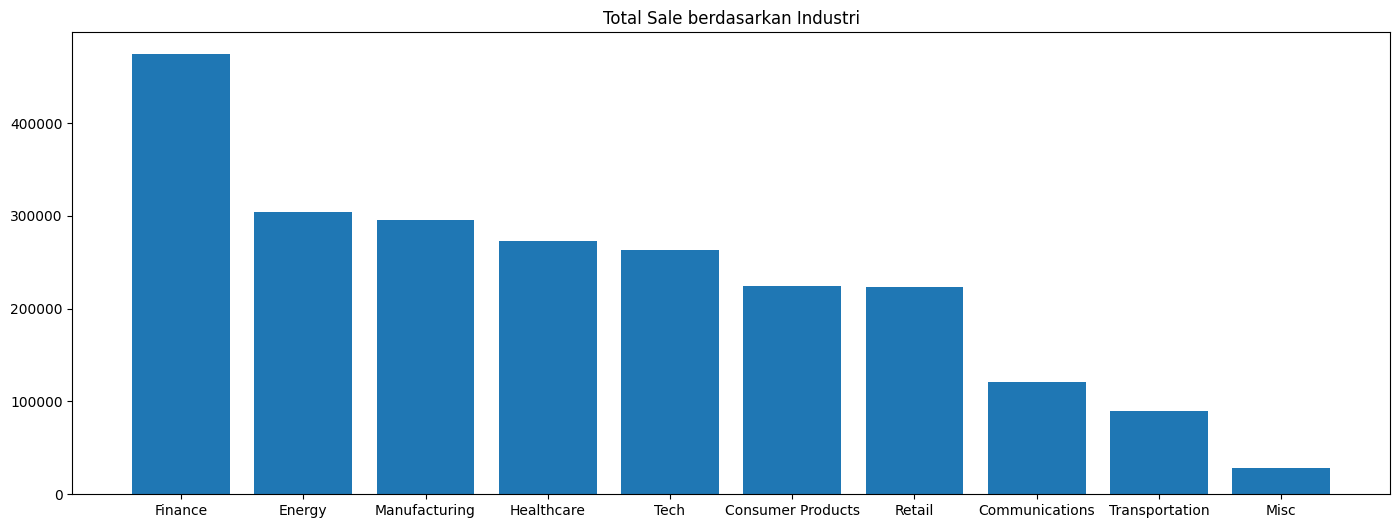

In [179]:
fig, ax = plt.subplots(figsize=(17, 6))

ax.bar(height=data_is['Sales'],x=data_is['Industry'])
ax.set_title('Total Sale berdasarkan Industri')

plt.show()

In [180]:
data_is_2023 = data[(pd.DatetimeIndex(data['Order Date']).year == 2023)][['Industry','Sales']]
data_is_2023 = data_is_2023.groupby(by='Industry').sum().reset_index()
data_is_2023.sort_values(by='Sales',ascending=False,inplace=True)
data_is_2023

,Industry,Sales
3,Finance,164788.8843
2,Energy,96422.8463
5,Manufacturing,94555.8376
8,Tech,89059.0890
4,Healthcare,79782.8290
1,Consumer Products,70179.5720
7,Retail,69735.9360
0,Communications,37189.8450
9,Transportation,26978.0720
6,Misc,5254.1120


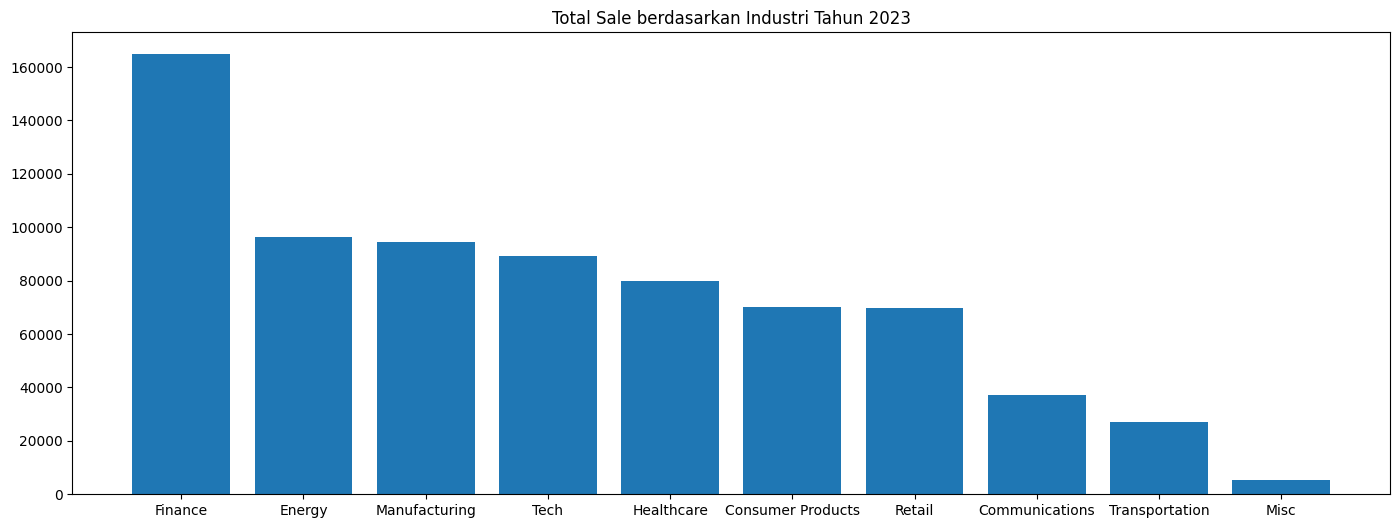

In [181]:
fig, ax = plt.subplots(figsize=(17, 6))

ax.bar(height=data_is_2023['Sales'],x=data_is_2023['Industry'])
ax.set_title('Total Sale berdasarkan Industri Tahun 2023')

plt.show()

In [182]:
# Uji tatistik untuk melihat apakah ada satu industri yang memiliki mendian Salesnya lebih tinggi signifikan dibandingkan industri yang lain
# karena distribusi data tidak normal, gunakan Kruskal
stat, pvalue = kruskal(*[data[data['Industry']==i]['Sales'] for i in data['Industry'].unique()])

alpha = 0.05

if pvalue > alpha:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > {alpha}. Gagal menolak Ho (Fail To Reject Ho).
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa minimal ada 1 Industri yang berbeda median Sales-nya. 
    Tetapi kita tidak tahu yang mana.
    ''')
else:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= {alpha}. Menolak Ho (Reject Ho).
    Kita punya cukup bukti untuk mengatakan bahwa minimal ada 1 Industri yang berbeda median Sales-nya. 
    Tetapi kita tidak tahu yang mana.
    ''')


    pvalue = 0.40668. pvalue > 0.05. Gagal menolak Ho (Fail To Reject Ho).
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa minimal ada 1 Industri yang berbeda median Sales-nya. 
    Tetapi kita tidak tahu yang mana.
    


In [183]:
data_industry = data[['Industry','Sales']]
data_industry.groupby('Industry').median()

,Sales
Industry,
Communications,44.128
Consumer Products,49.650
Energy,49.876
Finance,59.904
Healthcare,59.520
Manufacturing,56.605
Misc,58.730
Retail,51.795
Tech,55.974


In [184]:
data[(data['Industry']=='Finance')]['Customer'].unique()

array(['BNP Paribas', 'Wells Fargo', 'Banco Santander', 'Morgan Stanley',
       'Bank of America Corp.', 'Aviva', 'Fannie Mae', 'Itochu',
       'Trafigura Group', 'Prudential Financial',
       'State Farm Insurance Cos.', 'American Express',
       'J.P. Morgan Chase & Co.', 'Allstate', 'Allianz',
       'Goldman Sachs Group', 'HSBC Holdings', 'General Electric',
       'Berkshire Hathaway', 'Citigroup'], dtype=object)

### Insight
1. Berdasarkan uji statis tidak ada sebuah industri yang secara signifikan berdampak pada penjualan produk SaaS.
2. Berdasarkan grafik yang dihasilkan industri Finance merupakan industri yang paling banyak mengkonsumsi produk SaaS.

## **6. Kesimpulan**
Berdasarkan hasil analisis yang telah dilakukan maka dapat ditarik kesempulan untuk menjawap rumusan masalah yang ada sebagai beirkut :
1. **Seberapa tinggi tingkat penjualan produk SaaS di negara-negara tertentu ?**\
&emsp;US, UK dan Japan merupakan tiga negara terbesar dalam aktifitas bisnis SaaS. Dimana wilayah EMEA termasuk UK didalamnya merupakan wilayah yang memiliki sales produk SaaS tertinggi dari tahun 2020-2023 yakni 1.043.887 sales dan 45.4% dari total keseluruhan penjualan SaaS secara global. Berdasarkan negara US merupakan negara dengan sales tertinggi yakni 457687.6315, lalu UK dengan sales 313169.881, dan Japan dengan sales 170188.0458.
<br>
<br>
2. **Apakah setiap negara memiliki produk yang lebih diminati atau, didominasi oleh produk tertentu ?**\
&emsp;Berdsarkan uji statistik tidak ada sebuah produk yang paling mendominasi disebuah negara. Berdasarkan hasil analisis keseluruhan produk SaaS, produk ContactMatcher dan Support mendominasi penjualan produk SaaS dengan persentase ContactMatcher 18.4% dan Support 15.6% dari keseluruhan penjualan produk SaaS. Hasil analisis tren pada tahun 2023 dapat dilihat bahwa produk Support dan ContactMatcher adalah dua produk yang tren pada tahun tersebut dan pada wilayah AMER serta EMEA, produk sales produk ContactMatcher terus menigkat dari pertengahan tahun sampai akhir tahun.
<br>
<br>
3. **Siapa saja yang kemungkinan menjadi calon konsumen baru berdasarkan industri mereka ?**\
&emsp;Berdasarkan uji statistik tidak ada industri konsumen yang mendominasi penjualan produk SaaS. Berdasarkan hasil grafik, industri Finance merupakan salah satu industri yang membantu penjualan produk SaaS terutama pada wilayah EMEA dan AMER. Berdasarkan perhitungan total sale, industri Finance, Energy, dan Manufacturing merupakan tiga industri yang paling membantu penjualan produk SaaS dengan Finance membantu 474150.4844 penjualan produk SaaS, industri Energy	304644.1409, dan Manufacturing	295192.3812

## **7. Rekomendasi**
Perusahaan sebaiknya mengembangkan bisnisnya ke wilayah EMEA karena wilayah tersebut mendominasi total penjualan produk SaaS yakni sebesar 45.4% dari total penjualan secara gelobal. Produk yang paling diminati pada wilayah tersebut pada tahun 2023 yakni ContactMatcher atau Support. Sebaiknya bisnis berfokus kepada konsumen di industri Finance, Energy, atau Manufacture. Negara yang menjadi terget awal penjualan pada wilayah EMEA yakni UK, lalu dari negara tersebut dapat lebih disebarkan ke negara-negara lain di wilayah EMEA.